In [ ]:
TRAIN_DATASET_PATH = '/home/etaylor/code_projects/thesis/segments/etaylor_cannabis_patches_train_26-04-2024_15-44-44/trichome_dataset'
TEST_DATASET_PATH = '/home/etaylor/code_projects/thesis/segments/etaylor_cannabis_patches_test_26-04-2024_15-44-44/trichome_dataset'


In [10]:
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
import cv2
import seaborn as sns
import pandas as pd

def calculate_image_stats(image_path):
    image = Image.open(image_path)
    image_np = np.array(image)
    height, width = image_np.shape[:2]
    hsv_image = cv2.cvtColor(image_np, cv2.COLOR_RGB2HSV)
    mean_color_hsv = np.mean(hsv_image, axis=(0, 1))
    return height, width, mean_color_hsv

def collect_stats(dataset_path):
    stats = defaultdict(lambda: {
        'num_images': 0,
        'total_height': 0,
        'total_width': 0,
        'total_color_hsv': np.zeros(3),
        'heights': [],
        'widths': [],
        'colors_hsv': []
    })
    
    classes = ['clear', 'cloudy', 'amber']
    
    for cls in classes:
        class_path = os.path.join(dataset_path, cls)
        if not os.path.exists(class_path):
            print(f"Class folder {cls} does not exist in {dataset_path}")
            continue
        
        for filename in os.listdir(class_path):
            file_path = os.path.join(class_path, filename)
            if os.path.isfile(file_path) and file_path.lower().endswith(('png', 'jpg', 'jpeg', 'bmp', 'tiff')):
                height, width, mean_color_hsv = calculate_image_stats(file_path)
                stats[cls]['num_images'] += 1
                stats[cls]['total_height'] += height
                stats[cls]['total_width'] += width
                stats[cls]['total_color_hsv'] += mean_color_hsv
                stats[cls]['heights'].append(height)
                stats[cls]['widths'].append(width)
                stats[cls]['colors_hsv'].append(mean_color_hsv)
    
    for cls in classes:
        if stats[cls]['num_images'] > 0:
            stats[cls]['mean_height'] = stats[cls]['total_height'] / stats[cls]['num_images']
            stats[cls]['mean_width'] = stats[cls]['total_width'] / stats[cls]['num_images']
            stats[cls]['mean_color_hsv'] = (stats[cls]['total_color_hsv'] / stats[cls]['num_images']).tolist()

    return stats

def plot_stats(stats):
    for cls, data in stats.items():
        if data['num_images'] > 0:
            print(f"Class: {cls}")
            print(f"Number of images: {data['num_images']}")
            print(f"Mean height: {data['mean_height']}")
            print(f"Mean width: {data['mean_width']}")
            print(f"Mean color (HSV): {data['mean_color_hsv']}")
            print()
            
            # Plot height and width distribution
            plt.figure(figsize=(12, 6))
            plt.subplot(1, 2, 1)
            sns.histplot(data['heights'], kde=True)
            plt.title(f'{cls} - Height Distribution')
            plt.xlabel('Height')
            plt.ylabel('Frequency')

            plt.subplot(1, 2, 2)
            sns.histplot(data['widths'], kde=True)
            plt.title(f'{cls} - Width Distribution')
            plt.xlabel('Width')
            plt.ylabel('Frequency')

            plt.show()
            
            # Plot HSV color distribution
            hsv_colors = np.array(data['colors_hsv'])
            hsv_df = pd.DataFrame(hsv_colors, columns=['Hue', 'Saturation', 'Value'])

            plt.figure(figsize=(12, 6))
            for i, col in enumerate(['Hue', 'Saturation', 'Value']):
                plt.subplot(1, 3, i + 1)
                sns.histplot(hsv_df[col], kde=True)
                plt.title(f'{cls} - {col} Distribution')
                plt.xlabel(col)
                plt.ylabel('Frequency')

            plt.show()
            
def plot_stats_together(stats):
    heights, widths, hues, saturations, values, labels = [], [], [], [], [], []
    
    for cls, data in stats.items():
        if data['num_images'] > 0:
            print(f"Class: {cls}")
            print(f"Number of images: {data['num_images']}")
            print(f"Mean height: {data['mean_height']}")
            print(f"Mean width: {data['mean_width']}")
            print(f"Mean color (HSV): {data['mean_color_hsv']}")
            print()
            
            heights.extend(data['heights'])
            widths.extend(data['widths'])
            hsv_colors = np.array(data['colors_hsv'])
            hues.extend(hsv_colors[:, 0])
            saturations.extend(hsv_colors[:, 1])
            values.extend(hsv_colors[:, 2])
            labels.extend([cls] * data['num_images'])
    
    # Plot height and width distribution
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    sns.histplot(data=heights, kde=True, hue=labels, multiple="stack")
    plt.title('Height Distribution by Class')
    plt.xlabel('Height')
    plt.ylabel('Frequency')

    plt.subplot(1, 2, 2)
    sns.histplot(data=widths, kde=True, hue=labels, multiple="stack")
    plt.title('Width Distribution by Class')
    plt.xlabel('Width')
    plt.ylabel('Frequency')

    plt.show()
    
    # Plot HSV color distribution
    plt.figure(figsize=(18, 6))
    plt.subplot(1, 3, 1)
    sns.histplot(data=hues, kde=True, hue=labels, multiple="stack")
    plt.title('Hue Distribution by Class')
    plt.xlabel('Hue')
    plt.ylabel('Frequency')

    plt.subplot(1, 3, 2)
    sns.histplot(data=saturations, kde=True, hue=labels, multiple="stack")
    plt.title('Saturation Distribution by Class')
    plt.xlabel('Saturation')
    plt.ylabel('Frequency')

    plt.subplot(1, 3, 3)
    sns.histplot(data=values, kde=True, hue=labels, multiple="stack")
    plt.title('Value Distribution by Class')
    plt.xlabel('Value')
    plt.ylabel('Frequency')

    plt.show()

In [14]:
# Collect stats for train and test datasets
train_stats = collect_stats(TRAIN_DATASET_PATH)
test_stats = collect_stats(TEST_DATASET_PATH)


Class: clear
Number of images: 852
Mean height: 35.62793427230047
Mean width: 35.57629107981221
Mean color (HSV): [48.381625036531325, 70.6420959591242, 156.45819503980005]



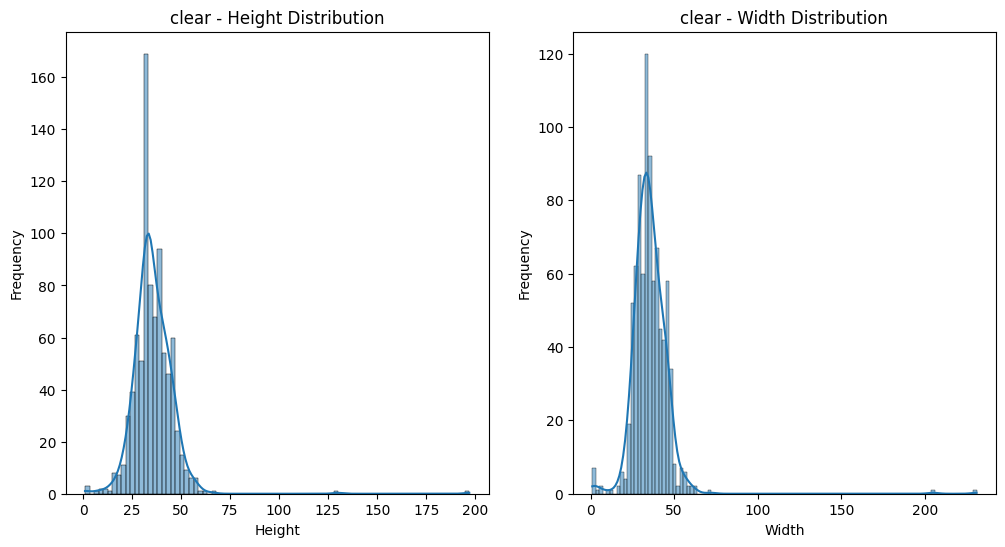

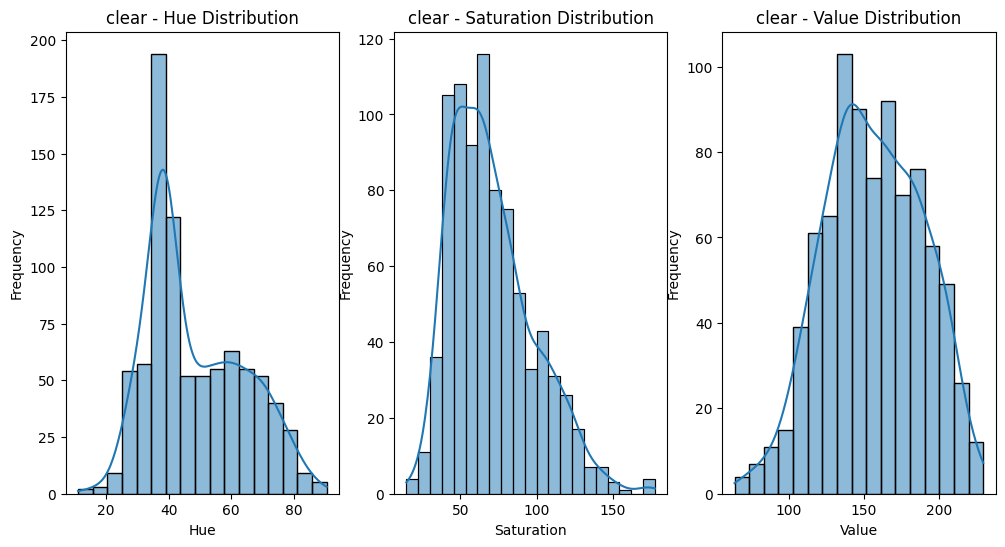

Class: cloudy
Number of images: 1084
Mean height: 38.84132841328413
Mean width: 38.465867158671585
Mean color (HSV): [47.2321559212841, 62.06724275846835, 179.455021797338]



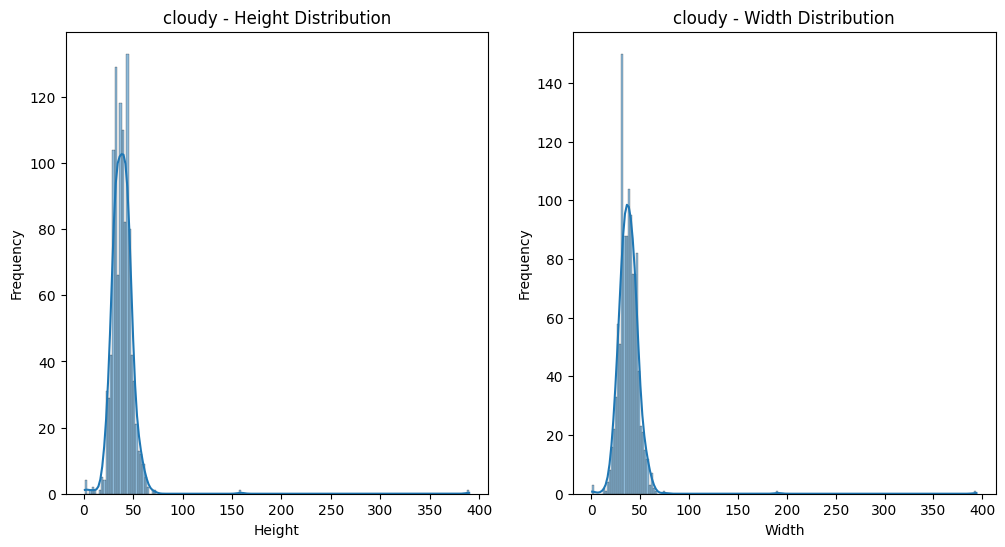

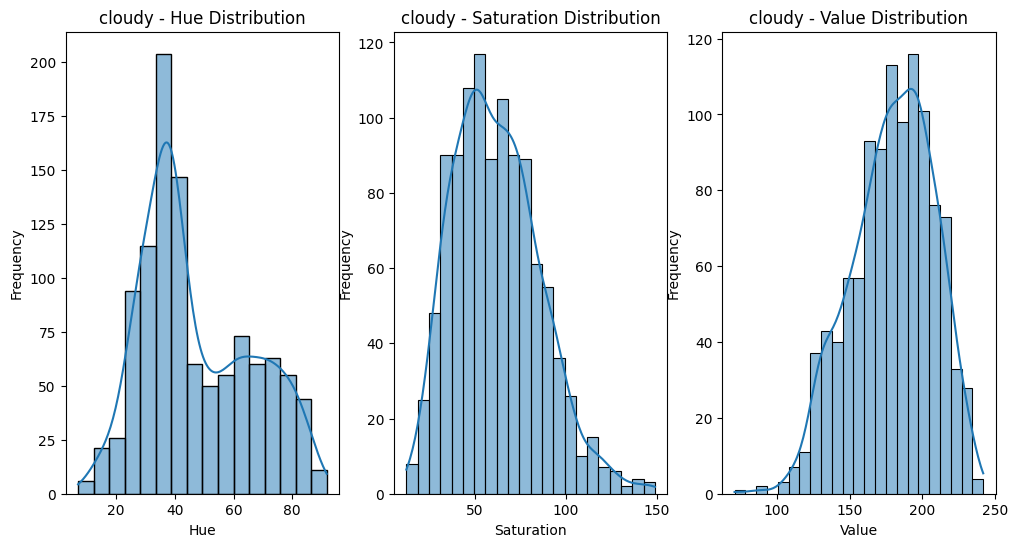

Class: amber
Number of images: 255
Mean height: 33.22352941176471
Mean width: 32.58039215686274
Mean color (HSV): [28.834545883545058, 98.4626172057052, 167.0129346174759]



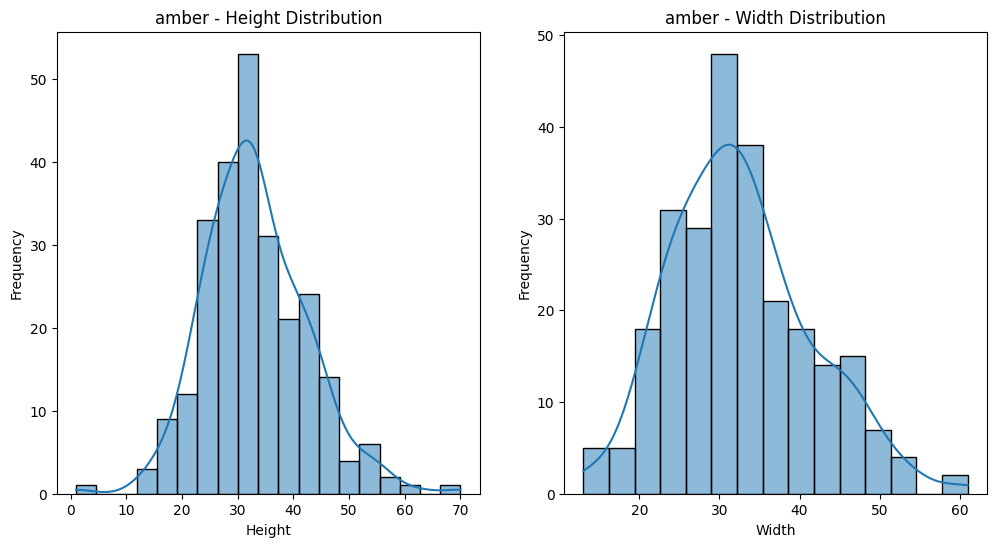

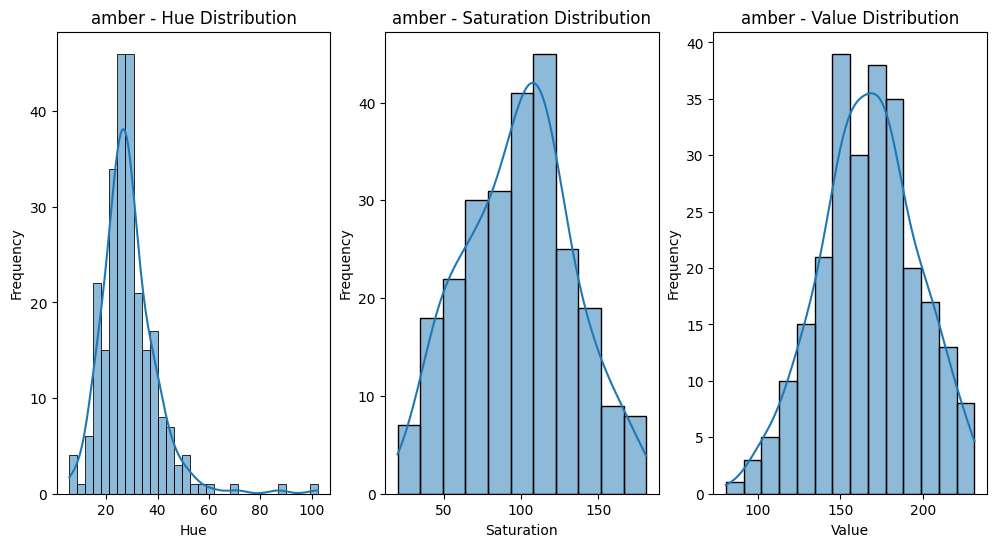

In [13]:
# Plot train data stats
plot_stats(train_stats)

Class: clear
Number of images: 216
Mean height: 36.916666666666664
Mean width: 36.958333333333336
Mean color (HSV): [45.23227836231098, 72.57726226832709, 166.03562474520837]



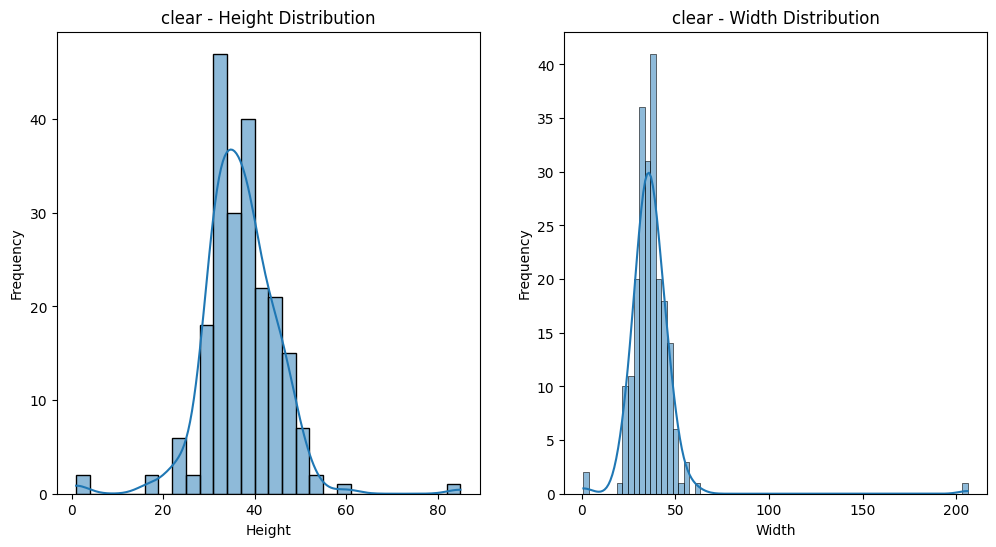

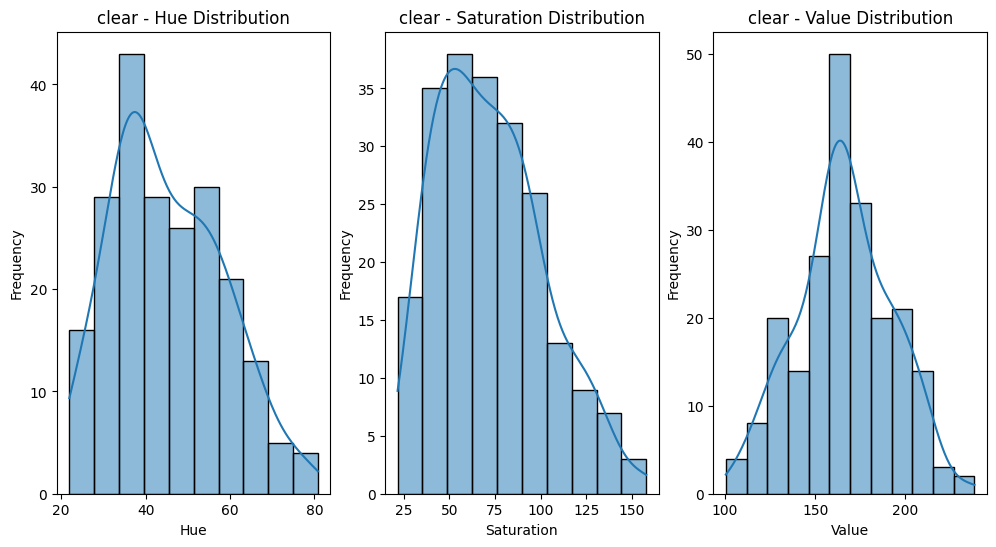

Class: cloudy
Number of images: 232
Mean height: 38.53448275862069
Mean width: 38.53879310344828
Mean color (HSV): [46.58935250153117, 62.81800611561849, 183.81362816880412]



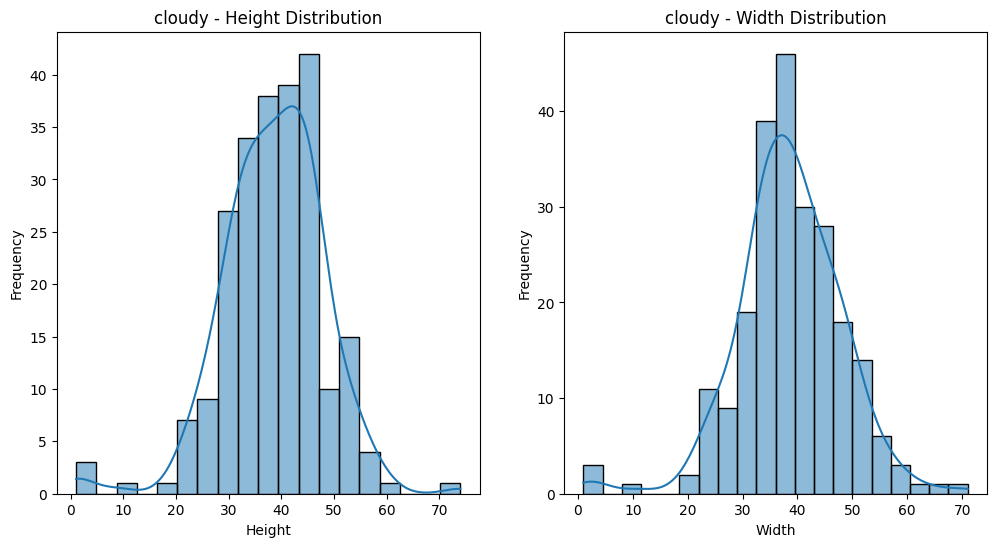

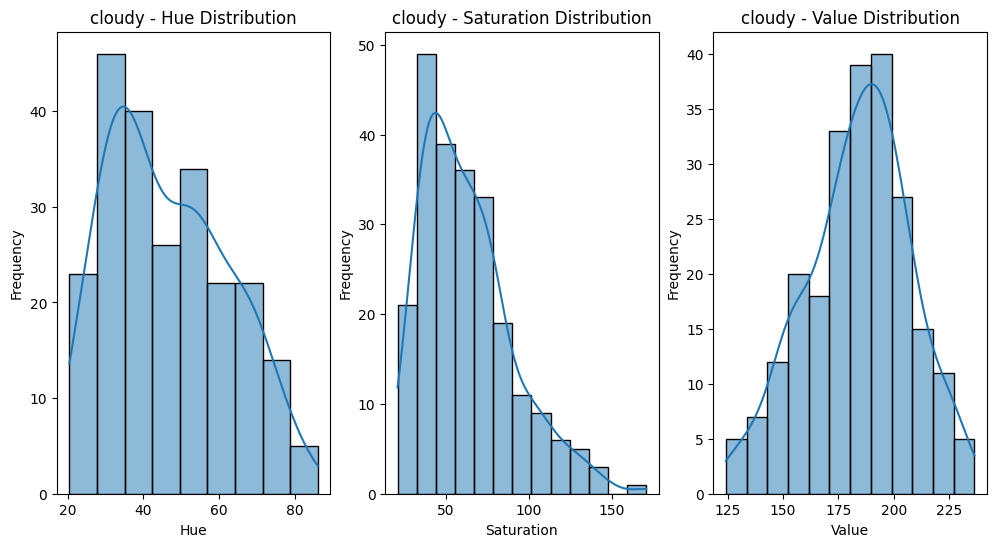

Class: amber
Number of images: 77
Mean height: 31.01298701298701
Mean width: 30.506493506493506
Mean color (HSV): [32.72024157970273, 101.32079102714191, 156.96902713664943]



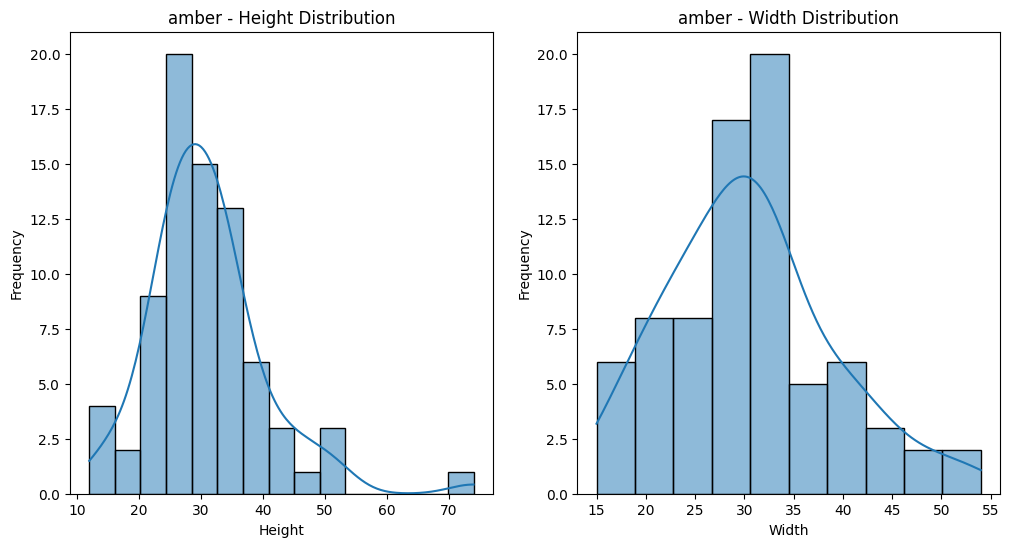

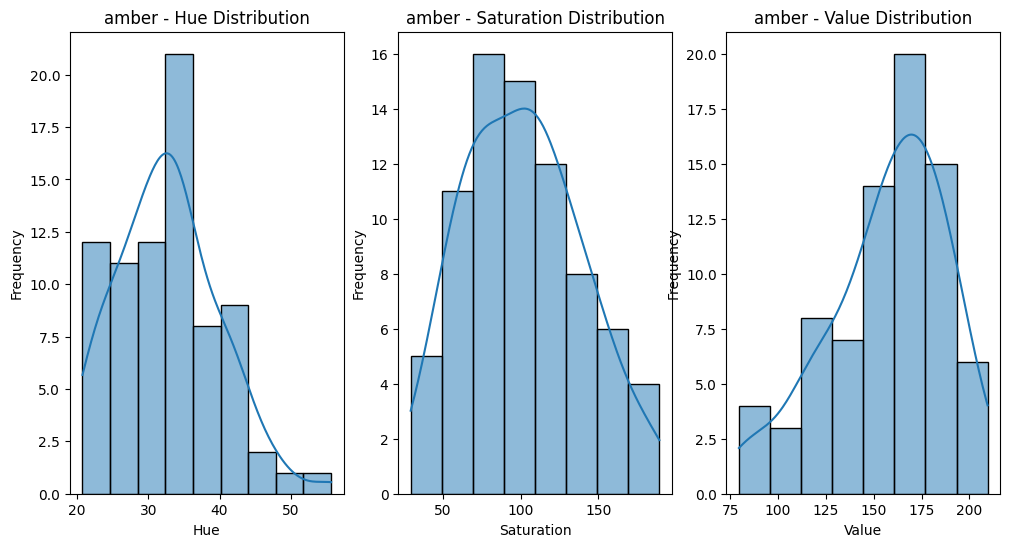

In [9]:
# plot test data stats
plot_stats(test_stats)

Class: clear
Number of images: 852
Mean height: 35.62793427230047
Mean width: 35.57629107981221
Mean color (HSV): [48.381625036531325, 70.6420959591242, 156.45819503980005]

Class: cloudy
Number of images: 1084
Mean height: 38.84132841328413
Mean width: 38.465867158671585
Mean color (HSV): [47.2321559212841, 62.06724275846835, 179.455021797338]

Class: amber
Number of images: 255
Mean height: 33.22352941176471
Mean width: 32.58039215686274
Mean color (HSV): [28.834545883545058, 98.4626172057052, 167.0129346174759]



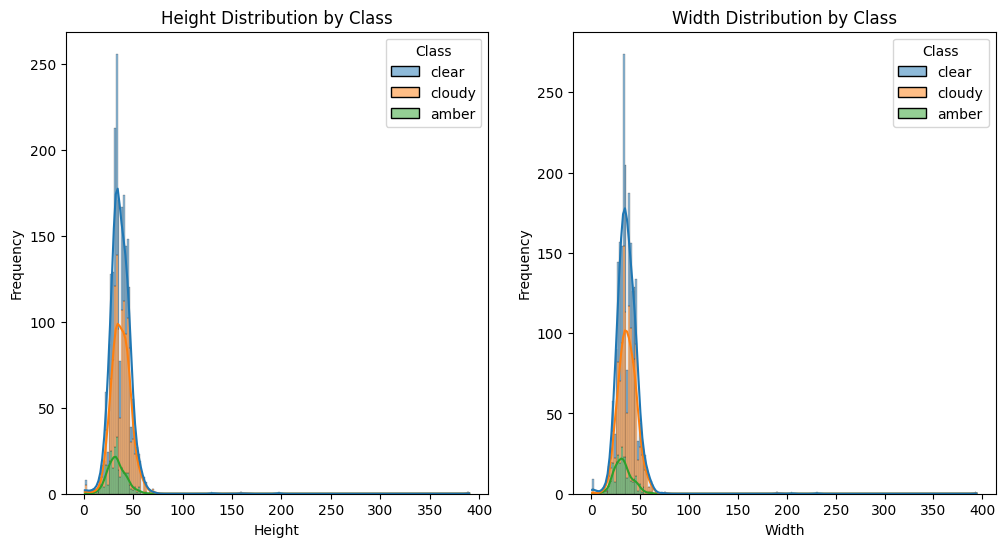

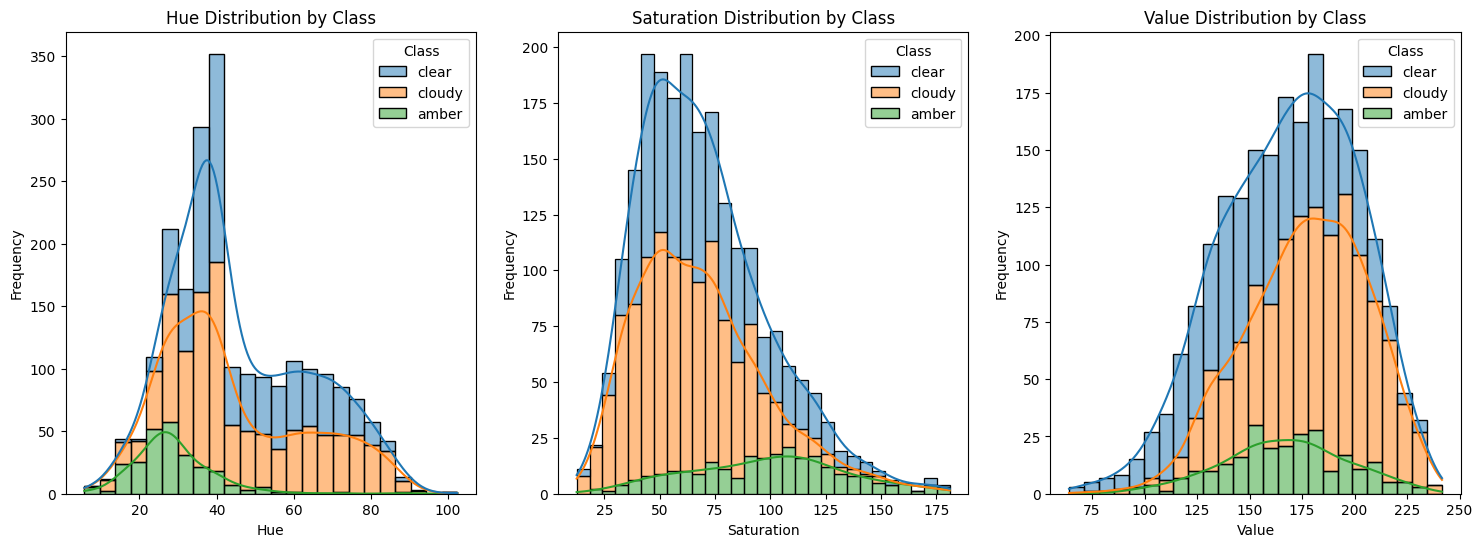

In [16]:
def plot_stats_together(stats):
    heights, widths, hues, saturations, values, labels = [], [], [], [], [], []
    
    for cls, data in stats.items():
        if data['num_images'] > 0:
            print(f"Class: {cls}")
            print(f"Number of images: {data['num_images']}")
            print(f"Mean height: {data['mean_height']}")
            print(f"Mean width: {data['mean_width']}")
            print(f"Mean color (HSV): {data['mean_color_hsv']}")
            print()
            
            heights.extend(data['heights'])
            widths.extend(data['widths'])
            hsv_colors = np.array(data['colors_hsv'])
            hues.extend(hsv_colors[:, 0])
            saturations.extend(hsv_colors[:, 1])
            values.extend(hsv_colors[:, 2])
            labels.extend([cls] * data['num_images'])
    
    # Convert to DataFrame for Seaborn
    df = pd.DataFrame({
        'Height': heights,
        'Width': widths,
        'Hue': hues,
        'Saturation': saturations,
        'Value': values,
        'Class': labels
    })
    
    # Plot height and width distribution
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    sns.histplot(data=df, x='Height', hue='Class', kde=True, multiple="stack")
    plt.title('Height Distribution by Class')
    plt.xlabel('Height')
    plt.ylabel('Frequency')

    plt.subplot(1, 2, 2)
    sns.histplot(data=df, x='Width', hue='Class', kde=True, multiple="stack")
    plt.title('Width Distribution by Class')
    plt.xlabel('Width')
    plt.ylabel('Frequency')

    plt.show()
    
    # Plot HSV color distribution
    plt.figure(figsize=(18, 6))
    plt.subplot(1, 3, 1)
    sns.histplot(data=df, x='Hue', hue='Class', kde=True, multiple="stack")
    plt.title('Hue Distribution by Class')
    plt.xlabel('Hue')
    plt.ylabel('Frequency')

    plt.subplot(1, 3, 2)
    sns.histplot(data=df, x='Saturation', hue='Class', kde=True, multiple="stack")
    plt.title('Saturation Distribution by Class')
    plt.xlabel('Saturation')
    plt.ylabel('Frequency')

    plt.subplot(1, 3, 3)
    sns.histplot(data=df, x='Value', hue='Class', kde=True, multiple="stack")
    plt.title('Value Distribution by Class')
    plt.xlabel('Value')
    plt.ylabel('Frequency')

    plt.show()

# Plot stats
plot_stats_together(train_stats)

Class: clear
Number of images: 216
Mean height: 36.916666666666664
Mean width: 36.958333333333336
Mean color (HSV): [45.23227836231098, 72.57726226832709, 166.03562474520837]

Class: cloudy
Number of images: 232
Mean height: 38.53448275862069
Mean width: 38.53879310344828
Mean color (HSV): [46.58935250153117, 62.81800611561849, 183.81362816880412]

Class: amber
Number of images: 77
Mean height: 31.01298701298701
Mean width: 30.506493506493506
Mean color (HSV): [32.72024157970273, 101.32079102714191, 156.96902713664943]



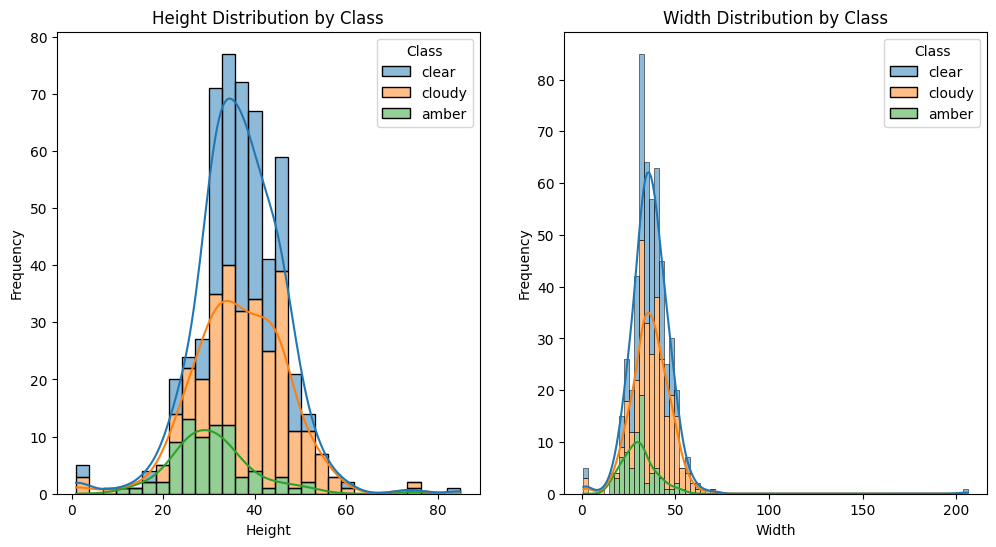

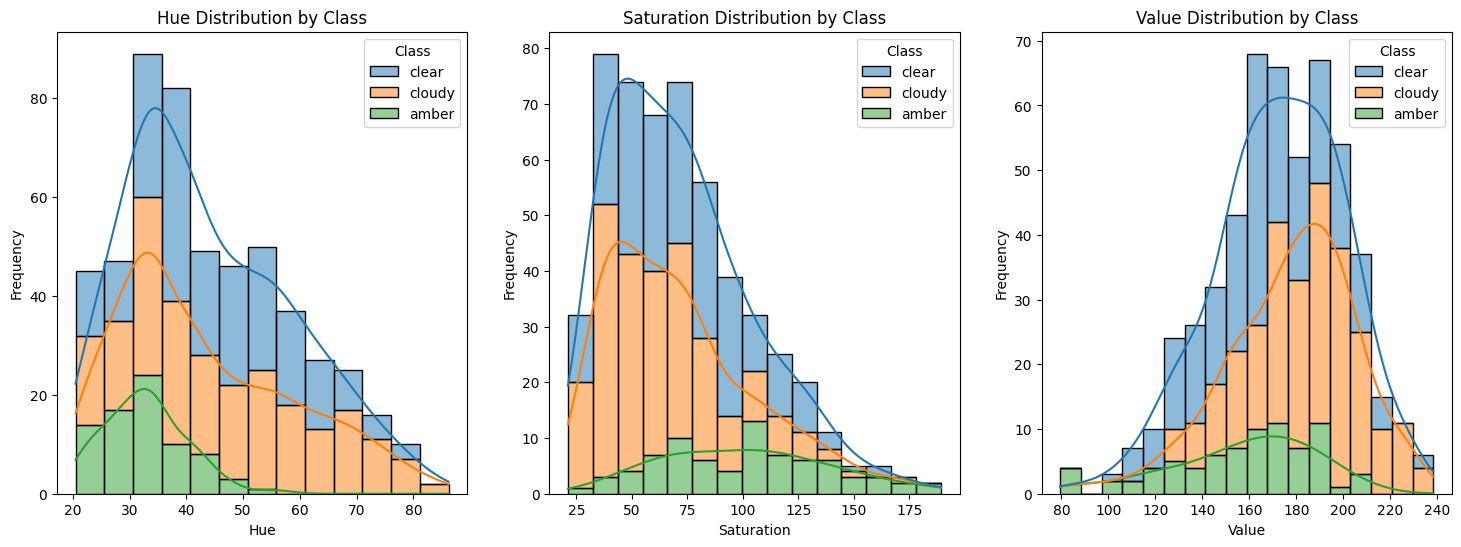

In [17]:
plot_stats_together(test_stats)


#### Class Balance
check if the classes are balanced

In [18]:
def class_balance_stats(stats):
    for cls, data in stats.items():
        if data['num_images'] > 0:
            print(f"Class: {cls}")
            print(f"Number of images: {data['num_images']}")
    print()

# Print class balance for train and test datasets
print("Train Dataset Class Balance:")
class_balance_stats(train_stats)

print("Test Dataset Class Balance:")
class_balance_stats(test_stats)


Train Dataset Class Balance:
Class: clear
Number of images: 852
Class: cloudy
Number of images: 1084
Class: amber
Number of images: 255

Test Dataset Class Balance:
Class: clear
Number of images: 216
Class: cloudy
Number of images: 232
Class: amber
Number of images: 77



#### Analyze Image Quality and Variations

In [20]:
import cv2

def analyze_image_quality(image_path):
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    laplacian_var = cv2.Laplacian(gray, cv2.CV_64F).var()
    return laplacian_var

def collect_image_quality_stats(dataset_path):
    quality_stats = defaultdict(list)
    classes = ['clear', 'cloudy', 'amber']

    for cls in classes:
        class_path = os.path.join(dataset_path, cls)
        if not os.path.exists(class_path):
            print(f"Class folder {cls} does not exist in {dataset_path}")
            continue

        for filename in os.listdir(class_path):
            file_path = os.path.join(class_path, filename)
            if os.path.isfile(file_path) and file_path.lower().endswith(('png', 'jpg', 'jpeg', 'bmp', 'tiff')):
                quality = analyze_image_quality(file_path)
                quality_stats[cls].append(quality)
    
    return quality_stats

def plot_image_quality_stats(stats):
    for cls, quality in stats.items():
        plt.figure(figsize=(8, 4))
        sns.histplot(quality, kde=True)
        plt.title(f'{cls} - Image Quality Distribution')
        plt.xlabel('Laplacian Variance')
        plt.ylabel('Frequency')
        plt.show()

# Collect and plot image quality stats for train and test datasets
train_quality_stats = collect_image_quality_stats(TRAIN_DATASET_PATH)
test_quality_stats = collect_image_quality_stats(TEST_DATASET_PATH)


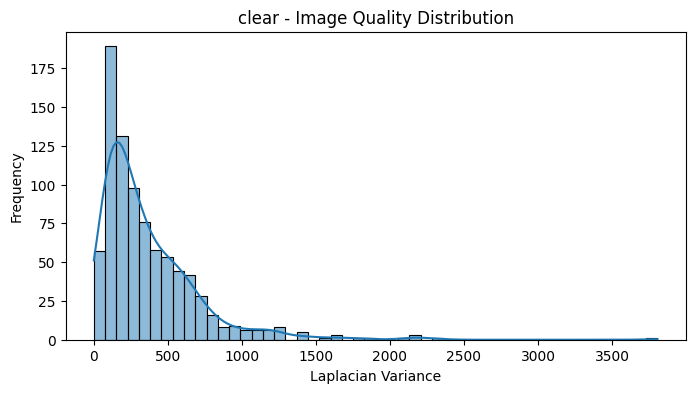

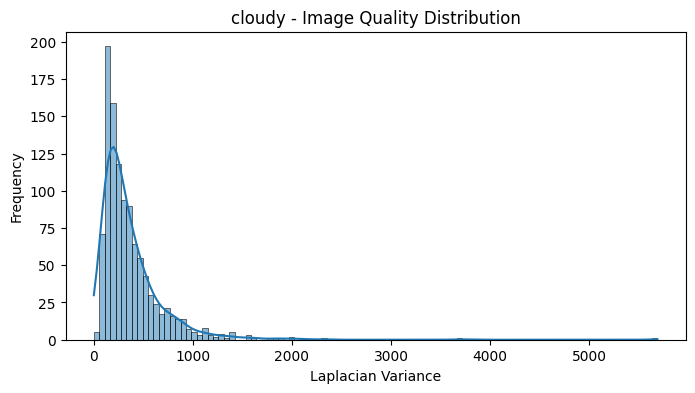

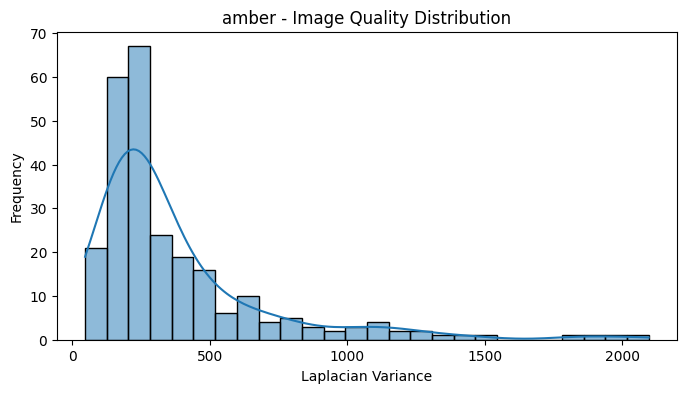

In [21]:
plot_image_quality_stats(train_quality_stats)

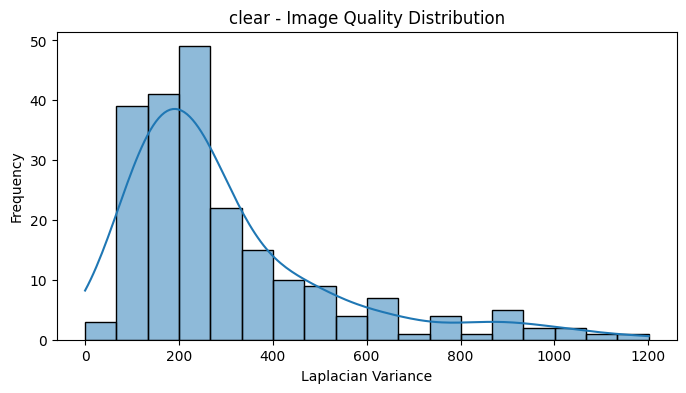

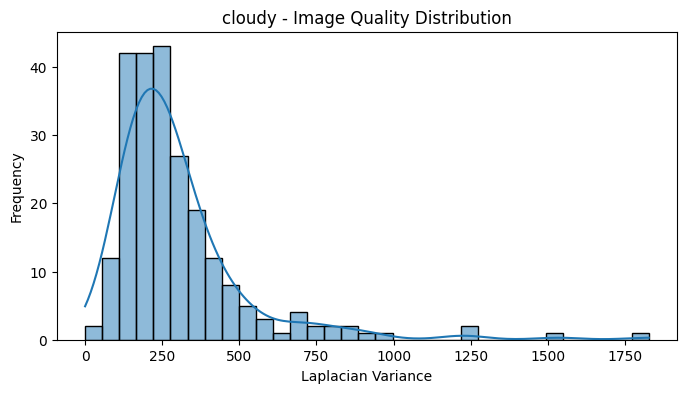

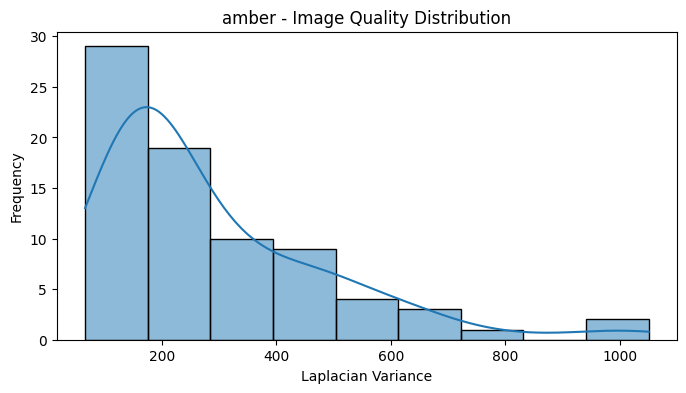

In [22]:
plot_image_quality_stats(test_quality_stats)